<a href="https://colab.research.google.com/github/ShubhamKumar2202/INVOICE-Clear_date-prediction/blob/main/Payment_date_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Payment Date Prediction 


### Importing related Libraries 

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from IPython.display import display
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime as date
import itertools

%matplotlib inline

### Store the dataset into the Dataframe


In [ ]:
df = pd.read_csv(r"/content/dataset.csv")

### Check the shape of the dataframe


In [ ]:
df.shape

(50000, 19)

### Check the Detail information of the dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

### Display All the column names

In [ ]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [ ]:
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [ ]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [ ]:
nulls = ''


for column in df:
  if df[column].isnull().values.any():
    nulls = nulls + (column + " = " + str((df[column].isna().sum() / len(df[column])) * 100) + "% null, ")
  
print(nulls[:-2:])

clear_date = 20.0% null, area_business = 100.0% null, invoice_id = 0.012% null


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [ ]:
df[['invoice_id', 'doc_id']].head(20)

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
5,2.960581e+09,2.960581e+09
6,1.930083e+09,1.930083e+09
7,1.930659e+09,1.930659e+09
8,1.929440e+09,1.929440e+09
9,1.928819e+09,1.928819e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [ ]:
from itertools import combinations
for c in combinations(['document_create_date.1', 'baseline_create_date', 'document_create_date'], 2):
  print("For {} and {} - {} columns are same and the percentage is {}%".format(c[0], c[1],( df[c[0]] == df[c[1]]).sum(), ( (df[c[0]] == df[c[1]]).sum() / len(df[c[0]]) * 100) ))

For document_create_date.1 and baseline_create_date - 44452 columns are same and the percentage is 88.90400000000001%
For document_create_date.1 and document_create_date - 21232 columns are same and the percentage is 42.464%
For baseline_create_date and document_create_date - 15963 columns are same and the percentage is 31.926%


#### Please check, Column 'posting_id' is constant columns or not


In [ ]:
df.posting_id.nunique()

1

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [ ]:
df.isOpen.nunique()

2

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [ ]:
df.drop(columns=['area_business', "posting_id",
"invoice_id",
"document_create_date",
"isOpen",
'document type', 
'document_create_date.1'], axis =1, inplace=True)


### Please check from the dataframe whether all the columns are removed or not 

In [ ]:
df.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

### Show all the Duplicate rows from the dataframe

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

### Display the Number of Duplicate Rows

In [ ]:
df.duplicated().sum()

1161

### Drop all the Duplicate Rows

In [ ]:
df = df.drop_duplicates()

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [ ]:
df.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [ ]:
df.shape

(48839, 12)

### Find out the total count of null values in each columns

In [ ]:
df.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [ ]:
df.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [ ]:
df[['clear_date', 'posting_date', 'due_in_date', 'baseline_create_date']].dtypes

clear_date               object
posting_date             object
due_in_date             float64
baseline_create_date    float64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [ ]:
df['clear_date'] = pd.to_datetime( pd.to_datetime( df["clear_date"].astype(str)).dt.strftime('%Y%m%d'))
df['posting_date'] = pd.to_datetime( pd.to_datetime( df["posting_date"]).dt.strftime('%Y%m%d'))
df['due_in_date'] = pd.to_datetime(((df['due_in_date'].astype(int))).astype(str))
df['baseline_create_date'] = pd.to_datetime(((df['baseline_create_date'].astype(int))).astype(str))

### Please check the datatype of all the columns after conversion of the above 4 columns

In [ ]:

df.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
invoice_currency                object
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms              object
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [ ]:
df['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [ ]:
df['total_open_amount'].head()

0    54273.28
1    79656.60
2     2253.86
3     3299.70
4    33133.29
Name: total_open_amount, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [ ]:

df["converted_usd"]=df.total_open_amount=np.where(df['invoice_currency']=='CAD',0.78*df.total_open_amount,df.total_open_amount)


### Display the new "converted_usd" column values

In [ ]:
df['converted_usd'].head()

0    54273.280
1    79656.600
2     2253.860
3     2573.766
4    33133.290
Name: converted_usd, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [ ]:
df['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [ ]:
df.drop(columns=['invoice_currency', 'total_open_amount'], inplace=True, axis=1)

### Write a code to check the number of columns in dataframe

In [ ]:
len(df.columns)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [ ]:
df.isnull().any()

business_code           False
cust_number             False
name_customer           False
clear_date               True
buisness_year           False
doc_id                  False
posting_date            False
due_in_date             False
baseline_create_date    False
cust_payment_terms      False
converted_usd           False
dtype: bool

#### Find out the number of null values from the column that you got from the above code

In [ ]:
df['clear_date'].isna().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [ ]:
main_data = df[df['clear_date'].isna() == False]
null_data = df[df['clear_date'].isna()]



### Check the number of Rows and Columns for both the dataframes 

In [ ]:
main_data.shape  

(39158, 11)

In [ ]:
null_data.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [ ]:
main_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.2800
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.6000
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.8600
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.2900
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,17336.1552


In [ ]:
null_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2573.766
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.590
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [ ]:
main_data['Delay'] = main_data['clear_date'] - main_data['due_in_date']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [ ]:
avgdelay = main_data.groupby('name_customer')['Delay'].mean(numeric_only=False)

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [ ]:
main_data['avg_delay'] = main_data['name_customer'].map(avgdelay)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [ ]:
main_data['avg_delay'] = main_data['avg_delay'].apply(lambda a: a.total_seconds())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Display the maindata dataframe 

In [ ]:
main_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.2800,1 days,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.6000,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.8600,92 days,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.2900,-3 days,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,17336.1552,61 days,6.172800e+06


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [ ]:
main_data.drop(columns=['Delay', 'clear_date'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [ ]:
y = main_data['avg_delay']

In [ ]:
X = main_data.drop(columns=['avg_delay'], axis=1)

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [ ]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size=0.4, random_state = 1)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [ ]:
print(X_train.shape) 
print(X_loc_test.shape) 
print(y_train.shape)
print(y_loc_test.shape)

(23494, 10)
(15664, 10)
(23494,)
(15664,)


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [ ]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size=0.5, random_state = 1) 

### Please check for the number of rows and columns of all the 4 dataframes 

In [ ]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)

(7832, 10)
(7832, 10)
(7832,)
(7832,)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


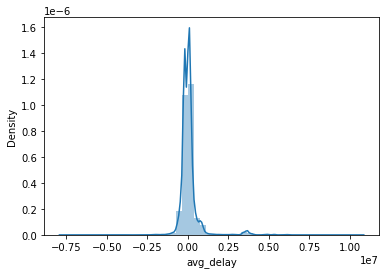

In [ ]:
sns.distplot(main_data['avg_delay'], bins=50)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [ ]:
x_train_grp = X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


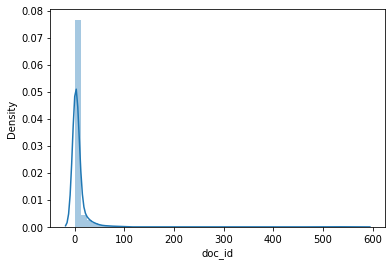

In [ ]:
sns.distplot(x_train_grp['doc_id'] , bins=50)

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


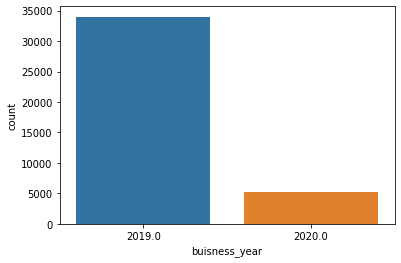

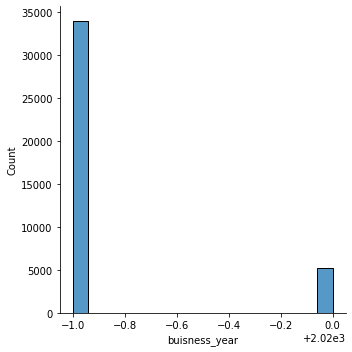

In [ ]:
sns.countplot(data= main_data , x = 'buisness_year')
sns.displot(main_data, x= 'buisness_year')

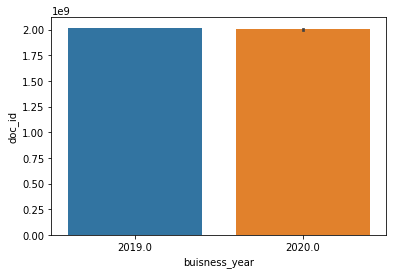

In [ ]:
sns.barplot(x ='buisness_year',y='doc_id', data = main_data)

# Feature Engineering 

### Display and describe the X_train dataframe 

In [ ]:
X_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
46683,U001,0200769623,WAL-MAR foundation,2019.0,1.930007e+09,2019-10-13,2019-10-28,2019-10-13,NAH4,38439.45
119,U001,0200772595,SAFEW corporation,2019.0,1.928838e+09,2019-02-21,2019-04-27,2019-02-21,NAGD,2588.65
13099,U001,0200494102,MCCA llc,2019.0,1.929297e+09,2019-05-10,2019-05-26,2019-05-10,C106,48174.00
6451,U001,0200726979,BJ'S corporation,2019.0,1.930248e+09,2019-12-08,2019-12-23,2019-12-08,NAA8,785.99
20492,U001,200759878,SA us,2019.0,1.929093e+09,2019-04-06,2019-04-21,2019-04-06,NAH4,55825.02


In [ ]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.00000,2.349400e+04,23494.000000
mean,2019.13429,2.013695e+09,31009.728217
std,0.34097,2.841794e+08,37084.254778
min,2019.00000,1.928511e+09,0.790000
25%,2019.00000,1.929182e+09,4603.485000
50%,2019.00000,1.929733e+09,17088.990000
75%,2019.00000,1.930212e+09,45947.235000
max,2020.00000,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [ ]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [ ]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [ ]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
46683,U001,1
119,U001,1
13099,U001,1
6451,U001,1
20492,U001,1
...,...,...
9723,U001,1
41318,U001,1
6410,CA02,0
15221,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [ ]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [ ]:
X_train ,X_val, X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [ ]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [ ]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [ ]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [ ]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [ ]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [ ]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [ ]:
X_train.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [ ]:
X_val.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [ ]:
X_test.dtypes

cust_number                        int64
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int64
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [ ]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [ ]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [ ]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [ ]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [ ]:
print(X_train.dtypes)
print(X_val.dtypes)
print(X_test.dtypes)

cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object
cust_number                 int64
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int64
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64


# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [ ]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [ ]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [ ]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [ ]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [ ]:
train=X_train.copy()
handling_correlation(train.copy(),.85)

['month_of_createdate',
 'year_of_due',
 'year_of_createdate',
 'month_of_due',
 'day_of_createdate',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

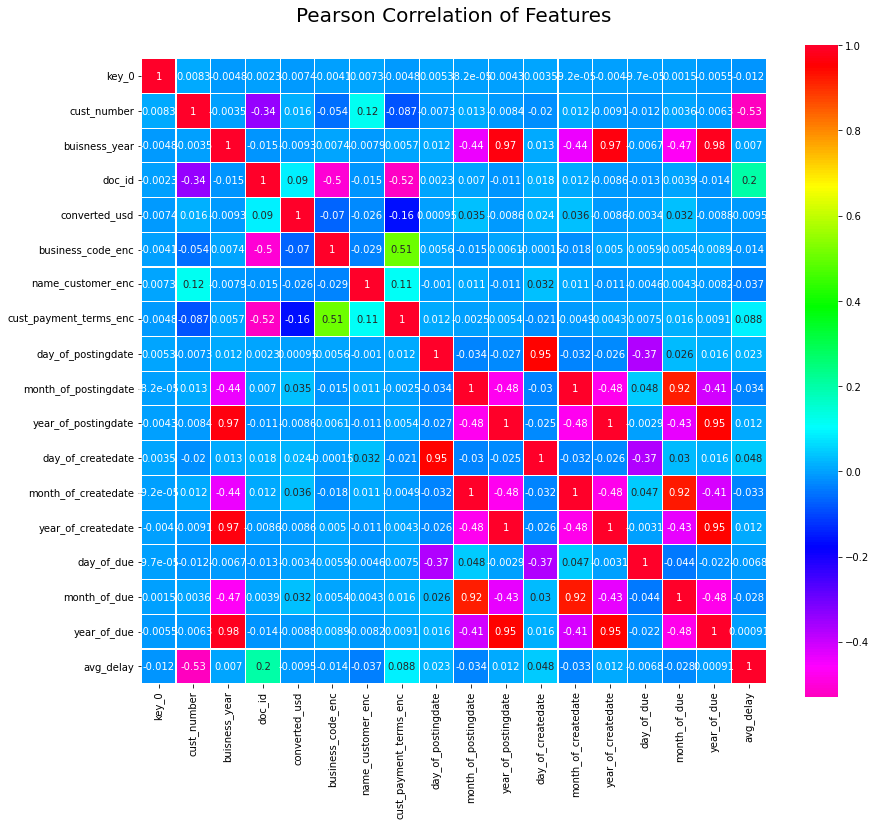

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [ ]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [ ]:
sel.variances_

array([1.77833834e+15, 1.16255908e-01, 8.07544916e+16, 1.37518342e+09,
       2.95552036e-01, 1.05154705e+06, 1.42931761e+02, 7.57900109e+01,
       1.22385606e+01, 1.17117448e-01, 7.72866281e+01, 1.22464552e+01,
       1.17244688e-01, 7.62405693e+01, 1.20839720e+01, 1.19220664e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [ ]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

536164.7523230114

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[276067549431.4721],[0.3568413760783816],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.svm import SVR
Algorithm.append('SupportVectorRegressor')
regressor_svr = SVR()
regressor_svr.fit(X_train, y_train)
predicted = regressor_svr.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor_svr.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

658884.2150675079

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor'],[276067549431.4721, 431871487392.05707],[0.3568413760783816, -0.0061373461461702306],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('DecisionTreeRegressor')
regressor_dtr = DecisionTreeRegressor()
regressor_dtr.fit(X_train, y_train)
predicted =  regressor_dtr.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor_dtr.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

505012.5623259518

### Display The Comparison Lists

In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor', 'DecisionTreeRegressor'],[276067549431.4721, 431871487392.05707, 215891960971.81366],[0.3568413760783816, -0.0061373461461702306, 0.49703332818246115],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [ ]:
from sklearn.ensemble import RandomForestRegressor
tregressor_rfr = RandomForestRegressor()

Algorithm.append('RandomForestRegressor')
regressor_rfr = RandomForestRegressor(random_state=35, max_depth=15)
regressor_rfr.fit(X_train, y_train)
predicted =  regressor_rfr.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test = regressor_rfr.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

360350.40819710545

### Display The Comparison Lists


In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor'],[276067549431.4721, 431871487392.05707, 215891960971.81366, 107483611068.4211],[0.3568413760783816, -0.0061373461461702306, 0.49703332818246115, 0.7495938529129735],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [ ]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

[08:37:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [ ]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [ ]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

377361.9336194036

### Display The Comparison Lists


In [ ]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'SupportVectorRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor', 'XGB Regressor'],[276067549431.4721, 431871487392.05707, 215891960971.81366, 107483611068.4211, 122188047633.87006],[0.3568413760783816, -0.0061373461461702306, 0.49703332818246115, 0.7495938529129735, 0.7153367111139718],

## You need to make the comparison list into a comparison dataframe 

In [ ]:
comparision_df = pd.DataFrame( {'Algorithm': Algorithm,
     'MSE_Score': MSE_Score,
     'R2_Score': R2_Score})

comparision_df

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,2.760675e+11,0.356841
1,SupportVectorRegressor,4.318715e+11,-0.006137
2,DecisionTreeRegressor,2.158920e+11,0.497033
3,RandomForestRegressor,1.074836e+11,0.749594
4,XGB Regressor,1.221880e+11,0.715337


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [ ]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

[08:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [ ]:
mean_squared_error(y_test,predictedfinal,squared=False)

349554.0696857498

### Calculate the mean Square Error for validation dataset

In [ ]:
mean_squared_error(y_val, predict_testfinal, squared=False)

377361.9336194036

### Calculate the R2 score for test

In [ ]:
(r2_score(y_test, predictedfinal))

0.7153367111139718

### Calculate the R2 score for Validation

In [ ]:
r2_score(y_val, predict_testfinal)

0.6698058717022567

### Calculate the Accuracy for train Dataset 

In [ ]:
regressorfinal.score(X_train, y_train)

0.7533453946890125

### Calculate the accuracy for validation

In [ ]:
regressorfinal.score(X_val, y_val)

0.6698058717022567

### Calculate the accuracy for test

In [ ]:
regressorfinal.score(X_test, y_test)

0.7153367111139718

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [ ]:
null_data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2573.766
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.590
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060


### Check for the number of rows and columns in the nulldata

In [ ]:
null_data.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [ ]:
null_data.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32414.555752
std,0.0,2.673629e+08,35951.502497
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5623.807800
50%,2020.0,1.930731e+09,19167.060000
75%,2020.0,1.930818e+09,48259.430000
max,2020.0,2.960636e+09,653644.800000


### Storing the Nulldata into a different dataset 
# for BACKUP

In [ ]:
null_data1 = null_data.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(null_data['business_code'])
null_data['business_code_enc'] = business_codern.transform(null_data['business_code'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [ ]:
null_data['cust_number'] = null_data['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [ ]:
null_data['day_of_cleardate'] = null_data['clear_date'].dt.day
null_data['month_of_cleardate'] = null_data['clear_date'].dt.month
null_data['year_of_cleardate'] = null_data['clear_date'].dt.year


null_data['day_of_postingdate'] = null_data['posting_date'].dt.day
null_data['month_of_postingdate'] = null_data['posting_date'].dt.month
null_data['year_of_postingdate'] = null_data['posting_date'].dt.year


null_data['day_of_due'] = null_data['due_in_date'].dt.day
null_data['month_of_due'] = null_data['due_in_date'].dt.month
null_data['year_of_due'] = null_data['due_in_date'].dt.year


null_data['day_of_createdate'] = null_data['baseline_create_date'].dt.day
null_data['month_of_createdate'] = null_data['baseline_create_date'].dt.month
null_data['year_of_createdate'] = null_data['baseline_create_date'].dt.year




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [ ]:
null_data['cust_payment_terms_enc']=label_encoder1.transform(null_data['cust_payment_terms'])
null_data['business_code_enc']=label_encoder1.transform(null_data['business_code'])
null_data['name_customer_enc']=label_encoder.transform(null_data['name_customer'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Check for the datatypes of all the columns of Nulldata

In [ ]:
null_data.dtypes

business_code                     object
cust_number                        int64
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [ ]:
null_data.drop(columns=['business_code',
"baseline_create_date",
"due_in_date",
"posting_date",
"name_customer",
"clear_date",
"cust_payment_terms",
'day_of_cleardate',
"month_of_cleardate",
"year_of_cleardate"], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Check the information of the "nulldata" dataframe

In [ ]:
null_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int64  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [ ]:
print(null_data.info() == X_test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 3 to 49995
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int64  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int64  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-null  

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [ ]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [ ]:
null_data.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [ ]:
nulldata2=null_data[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [ ]:
nulldata2.head()

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020.0,2.960623e+09,2573.766,67,2688,4,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020.0,1.930659e+09,11173.020,67,2771,20,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020.0,1.930611e+09,3525.590,67,90,20,11,3,2020,11,3,2020,26,3,2020
14,200739534,2020.0,1.930788e+09,121105.650,67,2012,20,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020.0,1.930817e+09,3726.060,67,718,36,23,4,2020,16,4,2020,26,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [ ]:

cols_when_model_builds = regressorfinal.get_booster().feature_names

null_data = null_data[cols_when_model_builds]

final_result =  regressorfinal.predict(null_data)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [ ]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [ ]:
final_result.head()

0    3.698584e+05
1    4.209329e+05
2    1.033422e+06
3    1.408150e+05
4   -2.483317e+05
Name: avg_delay, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
null_data1.reset_index(drop=True,inplace=True)
Final = null_data1.merge(final_result , on = null_data.index )

### Display the "Final" dataframe 

In [ ]:
Final.head()

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2573.766,3.698584e+05
1,7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020,4.209329e+05
2,10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.590,1.033422e+06
3,14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650,1.408150e+05
4,15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060,-2.483317e+05


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [ ]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [ ]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [ ]:
Final['clear_date'].head(15)

0    2020-04-14 06:44:18.406250000
1    2020-04-07 20:55:32.937500000
2    2020-04-06 23:03:42.437500000
3    2020-05-01 15:06:55.015625000
4    2020-04-23 03:01:08.296875000
5    2020-04-07 01:39:11.718750000
6    2020-03-26 21:47:32.375000000
7    2020-03-16 21:59:25.158203125
8    2020-04-22 10:25:05.488281250
9    2020-05-08 10:25:05.488281250
10   2020-04-05 15:26:48.640625000
11   2020-03-28 10:25:05.488281250
12   2020-05-21 01:44:56.343750000
13   2020-03-28 12:40:31.843750000
14   2020-04-22 16:14:01.750000000
Name: clear_date, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [ ]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [ ]:
Final['avg_delay'].head(15)

0      4.0
1      4.0
2     11.0
3      1.0
4     -3.0
5      2.0
6     10.0
7     -1.0
8      0.0
9      0.0
10    -3.0
11     0.0
12    -3.0
13     1.0
14    12.0
Name: avg_delay, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [ ]:

bins= [0,15,30,45,60,100]
labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [ ]:
Final.drop(columns = ['key_0', 'avg_delay'], axis=1, inplace=True)

### Display the count of each categoty of new "Aging Bucket" column 

In [ ]:
Final['Aging Bucket'].value_counts()

0-15               8596
31-45                67
16-30                42
46-60                 4
Greatar than 60       0
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [ ]:
Final.head(15)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,0140105686,SYSC llc,2020-04-14 06:44:18.406250000,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2573.7660,0-15
1,U001,0200744019,TARG us,2020-04-07 20:55:32.937500000,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.0200,0-15
2,U001,0200418007,AM,2020-04-06 23:03:42.437500000,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.5900,0-15
3,U001,0200739534,OK systems,2020-05-01 15:06:55.015625000,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.6500,0-15
4,U001,0200353024,DECA corporation,2020-04-23 03:01:08.296875000,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.0600,NaN
5,U001,0200744019,TARG associates,2020-04-07 01:39:11.718750000,2020.0,1.930676e+09,2020-03-21,2020-04-05,2020-03-21,NAA8,5893.0100,0-15
6,CA02,0140106408,WAL-M corp,2020-03-26 21:47:32.375000000,2020.0,2.960619e+09,2020-03-06,2020-03-16,2020-03-06,CA10,72409.1706,0-15
7,U001,0200337148,COAS llc,2020-03-16 21:59:25.158203125,2020.0,1.930592e+09,2020-03-02,2020-03-17,2020-03-02,NAA8,11380.8300,NaN
8,U001,0200794332,COST associates,2020-04-22 10:25:05.488281250,2020.0,1.930731e+09,2020-04-07,2020-04-22,2020-04-07,NAAX,3863.9300,0-15
9,U001,0200794332,COST llc,2020-05-08 10:25:05.488281250,2020.0,1.930804e+09,2020-04-23,2020-05-08,2020-04-23,NAAX,74453.0100,0-15


### Store this dataframe into the .csv format

In [ ]:
Final.to_csv(r'/content/final.csv')


# END OF THE PROJECT